In [5]:
import tensorflow as tf
import numpy as np
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

from pulearn import (
    MultilayerPerceptron,
    WeightedUnlabelledMultilayerPerceptron,
    UnlabelledExponentialLossMultilayerPerceptron,
    HardBootstrappingMultilayerPerceptron
)

from pulearn.utils import fit_and_plot, synthesize_pu_labels

In [6]:
# Network Parameters
n_input = 2
n_classes = 2

In [7]:
X, y = datasets.make_moons(n_samples=800, noise=0.2, random_state=0)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.5, random_state=42)
Y_train = np.eye(n_classes)[y_train]
print(X_train.shape)
print(Y_train.shape)

(400, 2)
(400, 2)


# Multilayer Perceptron without PU

Using [ 1.  1.]
Epoch: 0001 cost= 0.706658557
Epoch: 0011 cost= 0.576175213
Epoch: 0021 cost= 0.416572653
Epoch: 0031 cost= 0.348376222
Epoch: 0041 cost= 0.299164087
Epoch: 0051 cost= 0.250836834
Epoch: 0061 cost= 0.207513746
Epoch: 0071 cost= 0.169434655
Epoch: 0081 cost= 0.142692171
Epoch: 0091 cost= 0.124040894
Epoch: 0101 cost= 0.112343956
Epoch: 0111 cost= 0.103421060
Epoch: 0121 cost= 0.096415710
Epoch: 0131 cost= 0.091078341
Epoch: 0141 cost= 0.087265348
Epoch: 0151 cost= 0.085107395
Epoch: 0161 cost= 0.082275484
Epoch: 0171 cost= 0.080560267
Epoch: 0181 cost= 0.079828222
Epoch: 0191 cost= 0.076830683
Using [ 1.  1.]
Using [ 1.  1.]


<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

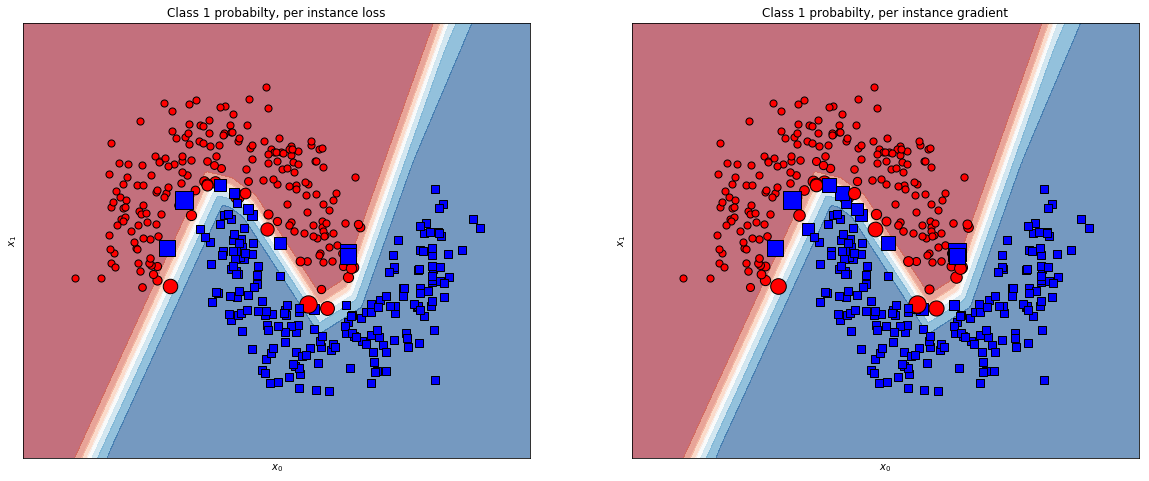

In [8]:
mp = MultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          alpha=0,
                          epochs=200,
                          verbose=True)
fit_and_plot(X_train, Y_train, mp, ["loss", "gradient"])

# PU setup

In [8]:
Y_train_pu = synthesize_pu_labels(Y_train, random_state=42)

### Normal

Using [ 1.  1.]
Epoch: 0001 cost= 1.380630881
Epoch: 0011 cost= 0.558869503
Epoch: 0021 cost= 0.500967324
Epoch: 0031 cost= 0.462158903
Epoch: 0041 cost= 0.440462664
Epoch: 0051 cost= 0.429777086
Epoch: 0061 cost= 0.422958717
Epoch: 0071 cost= 0.414526820
Epoch: 0081 cost= 0.402716845
Epoch: 0091 cost= 0.395400502
Using [ 1.  1.]
Using [ 1.  1.]


<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

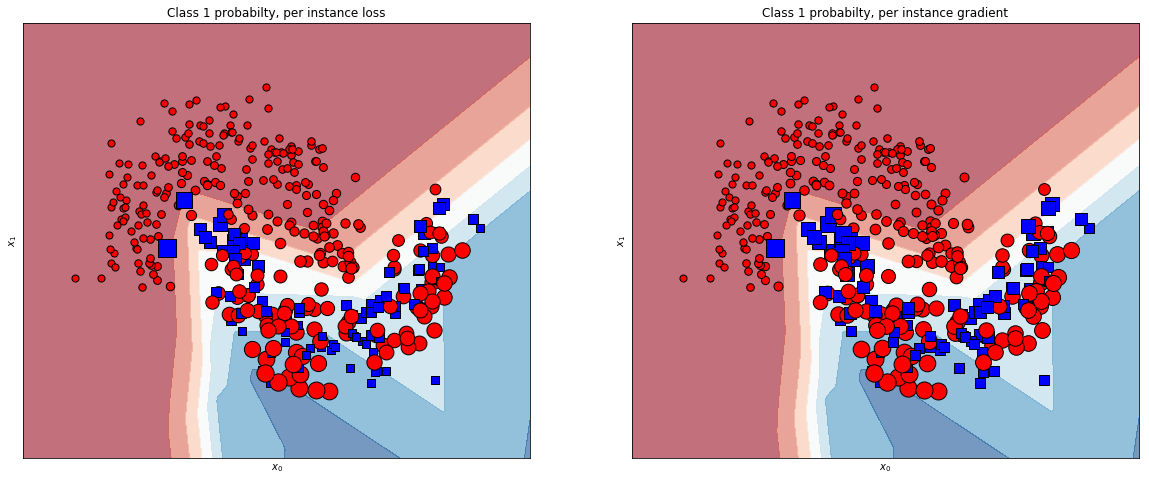

In [10]:
mp = MultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          alpha=0,
                          epochs=100,
                          class_weight=None,
                          verbose=True)
fit_and_plot(X_train, Y_train_pu.get(0.5), mp, ["loss", "gradient"])

### balanced learning

Using [ 1.          3.23157895]
Epoch: 0001 cost= 2.374539256
Epoch: 0011 cost= 1.067810893
Epoch: 0021 cost= 0.878389239
Epoch: 0031 cost= 0.813525990
Epoch: 0041 cost= 0.790648729
Epoch: 0051 cost= 0.780015081
Epoch: 0061 cost= 0.774676114
Epoch: 0071 cost= 0.771658659
Epoch: 0081 cost= 0.769589499
Epoch: 0091 cost= 0.767840296
Epoch: 0101 cost= 0.763470128
Epoch: 0111 cost= 0.759013355
Epoch: 0121 cost= 0.755235702
Epoch: 0131 cost= 0.748528495
Epoch: 0141 cost= 0.743192181
Epoch: 0151 cost= 0.736847550
Epoch: 0161 cost= 0.731339186
Epoch: 0171 cost= 0.722877026
Epoch: 0181 cost= 0.708839566
Epoch: 0191 cost= 0.690952435
Using [ 1.          3.23157895]
Using [ 1.          3.23157895]


<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

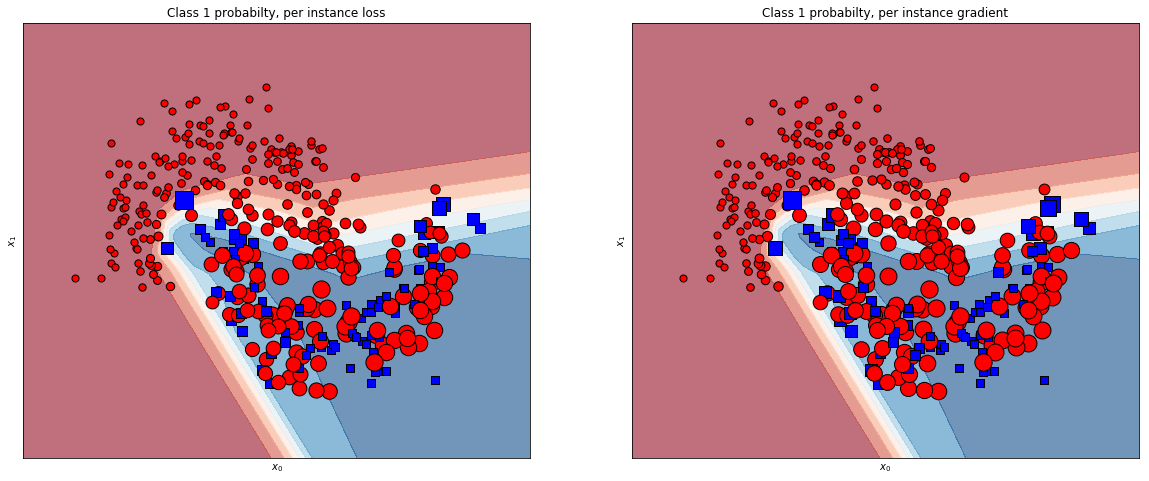

In [14]:
mp = MultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          alpha=0,
                          epochs=200,
                          class_weight="balanced",
                          verbose=True)
fit_and_plot(X_train, Y_train_pu.get(0.5), mp, ["loss", "gradient"])

### Weighted unlabelled sample

Using [ 1.          3.23157895]
Re-weighing to [ 1.          6.46315789]
Epoch: 0001 cost= 1.445636481
Epoch: 0011 cost= 1.112746269
Epoch: 0021 cost= 1.001121730
Epoch: 0031 cost= 0.949621394
Epoch: 0041 cost= 0.908307776
Epoch: 0051 cost= 0.871821389
Epoch: 0061 cost= 0.846313030
Epoch: 0071 cost= 0.823373139
Epoch: 0081 cost= 0.808992460
Epoch: 0091 cost= 0.793106645
Epoch: 0101 cost= 0.782562211
Epoch: 0111 cost= 0.784849882
Epoch: 0121 cost= 0.766381636
Epoch: 0131 cost= 0.759778857
Epoch: 0141 cost= 0.753069669
Epoch: 0151 cost= 0.748051643
Epoch: 0161 cost= 0.743744478
Epoch: 0171 cost= 0.742179900
Epoch: 0181 cost= 0.737735197
Epoch: 0191 cost= 0.739145055
Using [ 1.          3.23157895]
Re-weighing to [ 1.          6.46315789]
Using [ 1.          3.23157895]
Re-weighing to [ 1.          6.46315789]


<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

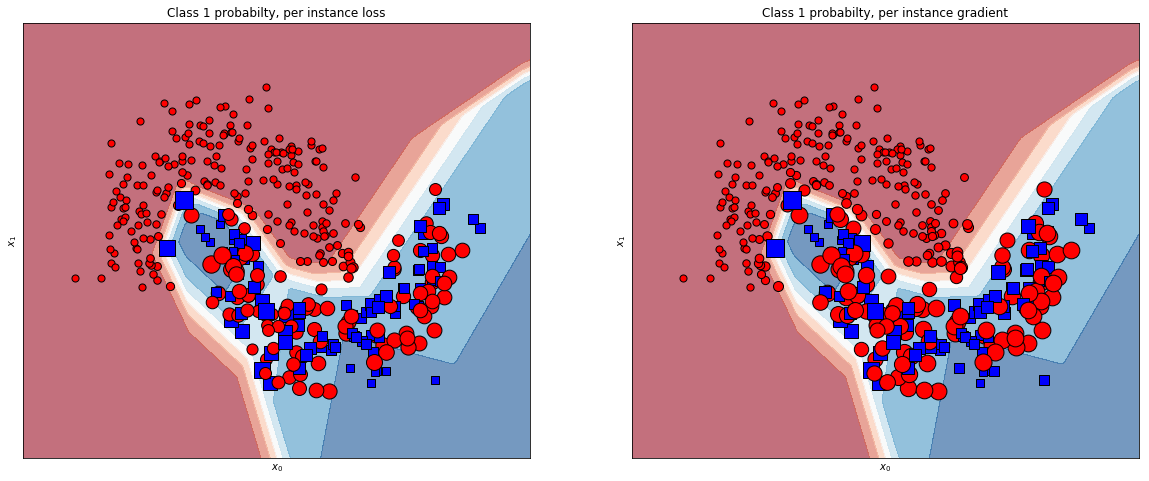

In [13]:
mp = WeightedUnlabelledMultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          alpha=0,
                          epochs=200,
                          class_weight="balanced",
                          unlabelled_weight={0:0.5, 1:1},
                          verbose=True)
fit_and_plot(X_train, Y_train_pu.get(0.5), mp, ["loss", "gradient"])

Using [ 0.5  1. ] for betas.
Using [ 1.          3.23157895]
Epoch: 0001 cost= 0.863467515
Epoch: 0011 cost= 0.636069745
Epoch: 0021 cost= 0.565633103
Epoch: 0031 cost= 0.518561304
Epoch: 0041 cost= 0.499503165
Epoch: 0051 cost= 0.483680435
Epoch: 0061 cost= 0.475151211
Epoch: 0071 cost= 0.455300681
Epoch: 0081 cost= 0.435386688
Epoch: 0091 cost= 0.415325686
Epoch: 0101 cost= 0.400700741
Epoch: 0111 cost= 0.399951302
Epoch: 0121 cost= 0.389729299
Epoch: 0131 cost= 0.385799915
Epoch: 0141 cost= 0.383531734
Epoch: 0151 cost= 0.382652000
Epoch: 0161 cost= 0.379384950
Epoch: 0171 cost= 0.375785492
Epoch: 0181 cost= 0.369548894
Epoch: 0191 cost= 0.363969646
Using [ 1.          3.23157895]
Using [ 1.          3.23157895]


<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

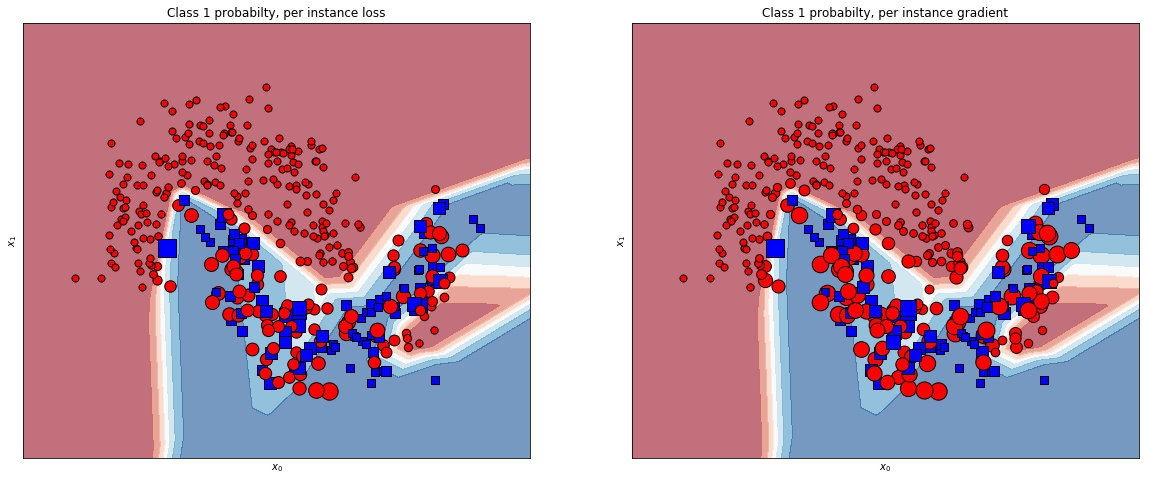

In [5]:
hbmp = HardBootstrappingMultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=1e-2,
                          alpha=0,
                          epochs=200,
                          class_weight="balanced",
                          unlabelled_weight={0:0.5, 1:1},
                          verbose=True)
fit_and_plot(X_train, Y_train_pu.get(0.5), hbmp, ["loss", "gradient"])

## Expontenital loss for unlabelled samples

Using [ 1.          3.23157895]
Epoch: 0001 cost= 1.925581217
Epoch: 0011 cost= 0.549813420
Epoch: 0021 cost= 0.453253247
Epoch: 0031 cost= 0.398595385
Epoch: 0041 cost= 0.375760719
Epoch: 0051 cost= 0.361988567
Epoch: 0061 cost= 0.351132676
Epoch: 0071 cost= 0.343413625
Epoch: 0081 cost= 0.331760667
Epoch: 0091 cost= 0.322550252
Epoch: 0101 cost= 0.314178176
Epoch: 0111 cost= 0.307034597
Epoch: 0121 cost= 0.298595965
Epoch: 0131 cost= 0.289375819
Epoch: 0141 cost= 0.281143572
Epoch: 0151 cost= 0.275080878
Epoch: 0161 cost= 0.268578421
Epoch: 0171 cost= 0.265030760
Epoch: 0181 cost= 0.260327898
Epoch: 0191 cost= 0.260094926
Using [ 1.          3.23157895]
Using [ 1.          3.23157895]


<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

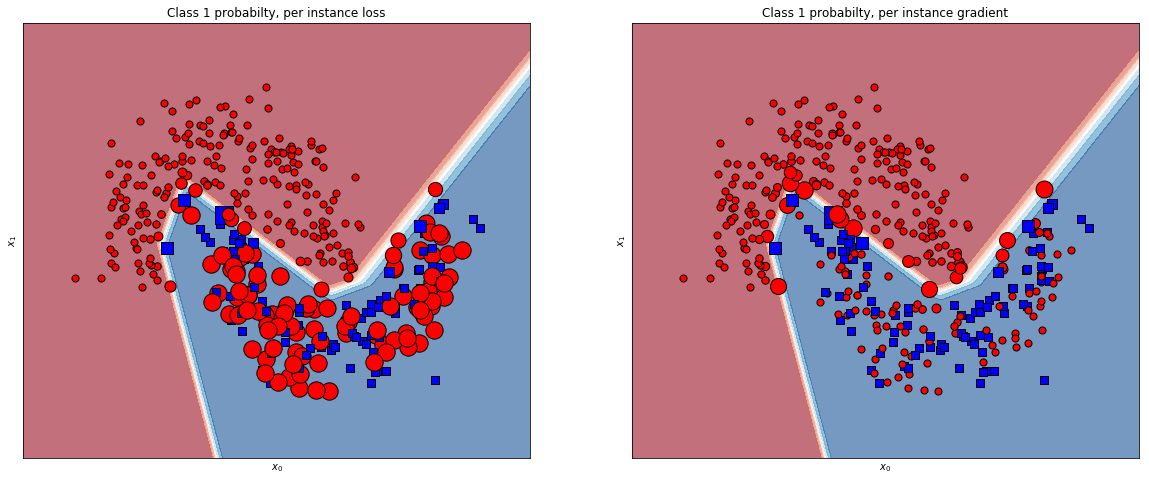

In [23]:
uelmp = UnlabelledExponentialLossMultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=1e-2,
                          alpha=0,
                          epochs=200,
                          class_weight="balanced",
                          unlabelled_weight=None,
                          verbose=True)
fit_and_plot(X_train, Y_train_pu.get(0.5), uelmp, ["loss", "gradient"])

Using [ 1.          3.23157895]
Re-weighing to [ 1.          6.46315789]
Epoch: 0001 cost= 0.837718323
Epoch: 0011 cost= 0.768892393
Epoch: 0021 cost= 0.762839973
Epoch: 0031 cost= 0.713350698
Epoch: 0041 cost= 0.588772267
Epoch: 0051 cost= 0.556012399
Epoch: 0061 cost= 0.518909335
Epoch: 0071 cost= 0.466756649
Epoch: 0081 cost= 0.432517000
Epoch: 0091 cost= 0.394140065
Epoch: 0101 cost= 0.356789127
Epoch: 0111 cost= 0.330796145
Epoch: 0121 cost= 0.313729033
Epoch: 0131 cost= 0.301611800
Epoch: 0141 cost= 0.290746257
Epoch: 0151 cost= 0.282855369
Epoch: 0161 cost= 0.275699109
Epoch: 0171 cost= 0.269342717
Epoch: 0181 cost= 0.265661605
Epoch: 0191 cost= 0.263067912
Using [ 1.          3.23157895]
Re-weighing to [ 1.          6.46315789]
Using [ 1.          3.23157895]
Re-weighing to [ 1.          6.46315789]


<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

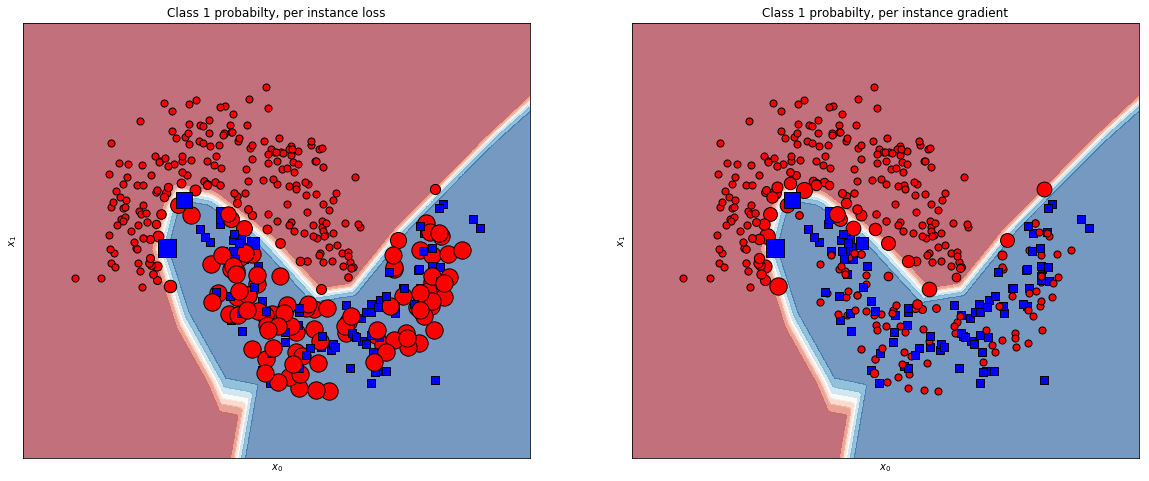

In [24]:
uelmp = UnlabelledExponentialLossMultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          alpha=0,
                          epochs=200,
                          class_weight="balanced",
                          unlabelled_weight={0:0.5, 1:1},
                          verbose=True)
fit_and_plot(X_train, Y_train_pu.get(0.5), uelmp, ["loss", "gradient"])

## The effect of unlabelled example weight

In [ ]:
n_input = 2
n_classes = 2


n_iters = 10

args_list = []
for it in range(n_iters):
    
    X, y = datasets.make_moons(n_samples=800, noise=0.2)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.5, random_state=42)
    Y_train = np.eye(n_classes)[y_train]
    Y_train_pu = get_PU_labels(Y_train, random_seed=42, verbose=False)
    
    for pct_missing in Y_train_pu.keys():
        for w_unl in np.arange(0.1, 1.01, 0.1):
            for clsf in ['mlp', 'hardb_mlp', 'clsdep_mlp']:
                data = {}
                data["X_train"] = X_train
                data["Y_train"] = Y_train_pu[pct_missing]
                data["X_test"] = X_test
                data["y_test"] = y_test
                data["pct_missing"] = pct_missing
                data["clsf"] = clsf
                data["w_unlabelled"] = w_unl
                args_list.append(data)

def fit_classifier(args):
    pct_missing = args['pct_missing']
    w_unlabelled = args['w_unlabelled']
    
    X_train = args["X_train"]
    Y_train = args["Y_train"]
    X_test = args["X_test"]
    y_test = args["y_test"]
    
    clsf = args["clsf"]
    if clsf == 'mlp':
        classifier = MultilayerPerceptron(n_input=n_input,
              n_classes=n_classes,
              n_hiddens=[8, 8],
              learning_rate=5e-3,
              regularization=0,
              training_epochs=200,
              class_weight=[w_unlabelled, 1],
              imbalanced=True,
              verbose=False)
    elif clsf == 'hardb_mlp':
        classifier = HardBoostrappingMultilayerPerceptron(n_input=n_input,
              n_classes=n_classes,
              n_hiddens=[8, 8],
              learning_rate=5e-3,
              regularization=0,
              training_epochs=200,
              class_weight=None,
              betas=[w_unlabelled, 1],
              imbalanced=True,
              verbose=False)
    elif clsf == 'clsdep_mlp':
        classifier = ClassDepLossMultilayerPerceptron(n_input=n_input,
              n_classes=n_classes,
              n_hiddens=[8, 8],
              learning_rate=5e-3,
              regularization=0,
              training_epochs=200,
              class_weight=[w_unlabelled, 1],
              imbalanced=True,
              verbose=False)
    print("Fitting:", clsf, "Missing:", pct_missing, "Unlabelled weight:", w_unlabelled)
    classifier.fit(X_train, Y_train)
    y_pred = classifier.predict(X_test)
    auc = metrics.roc_auc_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    acc = metrics.accuracy_score(y_test, y_pred)
    print("Got", "AUC:", auc, "F1-score:", f1, "Accuracy:", acc)
    record = {}
    record['%missing'] = pct_missing
    record['w_unlabelled'] = w_unlabelled
    record["classifier"] = clsf
    record['AUC'] = auc
    record['F1-score'] = f1
    record['Accuracy'] = acc
    return record

import pandas as pd
from multiprocessing import Pool
pool = Pool(processes=6)
acc_grid_list = pool.map(fit_classifier, args_list)
acc_grid = pd.DataFrame(acc_grid_list)
acc_grid.to_csv("weighted_unlabelled_moons.csv")

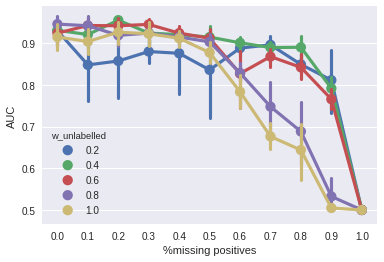

In [7]:
import seaborn as sns
%matplotlib inline
f, ax = plt.subplots(1)


sns.pointplot(x='%missing', y='AUC', hue='w_unlabelled', data=acc_grid[acc_grid['w_unlabelled'].isin([0.2, 0.4, 0.6, 0.8, 1.0])], ax=ax)
ax.set_xlabel('%missing positives')
ax.set_ylabel('AUC')